# NIKAO MNIST


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


#---------------------------------------------------------------

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Binarize pixel values to 0 or 1
X_train = (X_train > 127).astype('float32')
X_test = (X_test > 127).astype('float32')

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ModuleNotFoundError: No module named 'numpy'

torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])


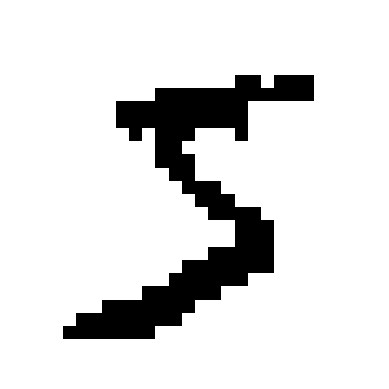

We have 500 Examples.


In [52]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

# Get first 500 examples
X_train = X_train[:500]
y_train = y_train[:500]

print(f"We have {len(X_train)} Examples.")


In [53]:
# Mudar o grid de 28x28 para 784x1 para ser digerido pela primeira camanada...

# Nikaaaao sempre usa o .view pq ele n gasta memoria...

X_train = X_train.view(-1, 28*28)
X_test = X_test.view(-1, 28*28)

#---------------------------------------------------------------
print(X_train.shape, X_test.shape)


torch.Size([500, 784]) torch.Size([10000, 784])


In [60]:
class Brein(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.g = torch.Generator().manual_seed(2147483647)

        self.W1 = torch.nn.Parameter(torch.randn((784, 2000), generator=self.g))
        self.b1 = torch.nn.Parameter(torch.randn(2000, generator=self.g))
        self.W2 = torch.nn.Parameter(torch.randn((2000, 100), generator=self.g))
        self.b2 = torch.nn.Parameter(torch.randn(100, generator=self.g))
        self.W3 = torch.nn.Parameter(torch.randn((100,10), generator=self.g))
        self.b3 = torch.nn.Parameter(torch.randn(10, generator=self.g))

        print(f"The NN has: {sum(p.numel() for p in self.parameters())} parameters")

    def forward(self, X, Y):
        camada1 = torch.tanh(X @ self.W1 + self.b1)
        camada2 = torch.tanh(camada1 @ self.W2 + self.b2)
        camada3 = camada2 @ self.W3 + self.b3
        probabilidades = torch.softmax(camada3, dim=1) # Softmax faz a ultima camada ser uma probabilidade...

        criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(probabilidades, Y)

        return loss   # retorna loss para treinar

# a call faz com que brein(input)

    def __call__(self, data_tensor):
        camada1 = torch.tanh(data_tensor @ self.W1 + self.b1)
        camada2 = torch.tanh(camada1 @ self.W2 + self.b2)
        camada3 = camada2 @ self.W3 + self.b3
        probabilidades = torch.softmax(camada3, dim=0) # Softmax faz a ultima camada ser uma probabilidade...

        return torch.argmax(probabilidades)
    
Brein = Brein()

The NN has: 1771110 parameters


In [61]:
batch_size = 32
learning_rate = 1  # Adjusted learning rate for SGD
epochs = 100

# Initialize SGD optimizer
optimizer = torch.optim.SGD(Brein.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Generate random indices for batch sampling
    indices = torch.randperm(len(X_train))
    total_loss = 0
    
    # Process mini-batches
    for i in range(0, len(X_train), batch_size):
        batch_indices = indices[i:i+batch_size]
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        loss = Brein.forward(X_batch, y_batch)
        
        # Backward pass
        loss.backward()
        print(f"The loss is: {loss}")
        
        # Update parameters using optimizer
        optimizer.step()
        
        total_loss += loss.item()
    


The loss is: 2.343496561050415
The loss is: 2.402465581893921
The loss is: 2.3653030395507812
The loss is: 2.3835997581481934
The loss is: 2.240396738052368
The loss is: 2.3639731407165527
The loss is: 2.3901071548461914
The loss is: 2.3109607696533203
The loss is: 2.29034161567688
The loss is: 2.2927050590515137
The loss is: 2.2903127670288086
The loss is: 2.30891752243042
The loss is: 2.244574546813965
The loss is: 2.3801932334899902
The loss is: 2.313706398010254
The loss is: 2.3011035919189453
The loss is: 2.24989652633667
The loss is: 2.210878372192383
The loss is: 2.247345447540283
The loss is: 2.374875545501709
The loss is: 2.306548833847046
The loss is: 2.36112642288208
The loss is: 2.1921334266662598
The loss is: 2.3125810623168945
The loss is: 2.305067777633667
The loss is: 2.289548635482788
The loss is: 2.188490629196167
The loss is: 2.279172658920288
The loss is: 2.3548264503479004
The loss is: 2.2385482788085938
The loss is: 2.198514461517334
The loss is: 2.314106464385986

The prediction is: 8
The actual label is: 5


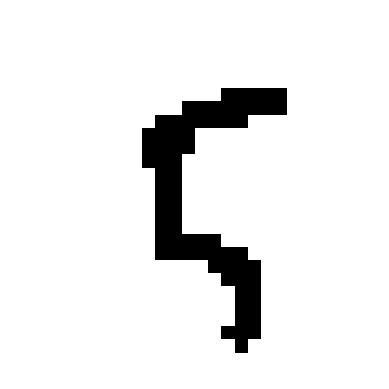

In [76]:
# Get prediction for one example
index = 100
prediction = Brein(X_train[index])
print(f"The prediction is: {prediction}")

print(f"The actual label is: {y_train[index]}")
# Reshape the 784-dimensional vector into 28x28 image
image = X_train[index].reshape(28, 28)
plt.imshow(image, cmap='binary')
plt.axis('off')
plt.show()
